In [7]:
!pip install geocoder
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen




In [28]:
ny = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])
ny
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url)
soup = BeautifulSoup(html)


In [27]:
table_contents=[]
table=soup.find('table')

for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

#print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [29]:
import geocoder # import geocoder
print('Geocoder imported')

Geocoder imported


In [33]:
df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')

In [34]:
df1

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [37]:
df3 = pd.merge(df,df2, left_on = 'PostalCode', right_on = 'Postal Code' , how = 'outer')
# i was thinking how to extract data from one df to another. looked for a number of options... but they were rather long and complicated.
# honestly, i am not even sure i could have implemented them... 
# so i just decided to merge the two dataframes. looked up the methods and voila! I merged the two dfs by the shared "Postal Code" column. Worked well :) 

df3
    


,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,M7A,43.662301,-79.389494
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,M7Y,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509


In [45]:
!pip install sklearn

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
#from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [61]:
x1 = []
for i in df3.loc[:,'Latitude']:
    x1.append(i)
print(x1)


[43.7532586, 43.7258823, 43.6542599, 43.718518, 43.6623015, 43.6678556, 43.8066863, 43.7459058, 43.7063972, 43.6571618, 43.709577, 43.6509432, 43.7845351, 43.7258997, 43.6953439, 43.6514939, 43.6937813, 43.6435152, 43.7635726, 43.6763574, 43.6447708, 43.6890256, 43.7709921, 43.7090604, 43.6579524, 43.669542, 43.773136, 43.8037622, 43.7543283, 43.7053689, 43.6505712, 43.6690051, 43.7447342, 43.7785175, 43.7679803, 43.685347, 43.6408157, 43.6479267, 43.7279292, 43.7869473, 43.7374732, 43.6795571, 43.6471768, 43.6368472, 43.7111117, 43.7574902, 43.7390146, 43.6689985, 43.6481985, 43.7137562, 43.7563033, 43.716316, 43.789053, 43.7284964, 43.6595255, 43.7332825, 43.6911158, 43.7247659, 43.692657, 43.7701199, 43.7616313, 43.7280205, 43.7116948, 43.6731853, 43.706876, 43.7574096, 43.7527583, 43.7127511, 43.6969476, 43.6616083, 43.696319, 43.7500715, 43.7827364, 43.7153834, 43.6727097, 43.6489597, 43.6369656, 43.6889054, 43.7942003, 43.7043244, 43.6626956, 43.6515706, 43.7816375, 43.6895743, 4

In [63]:
x2 = []
for i in df3.loc[:,'Longitude']:
    x2.append(i)
print(x2)

[-79.3296565, -79.3155716, -79.3606359, -79.4647633, -79.3894938, -79.5322424, -79.1943534, -79.352188, -79.309937, -79.3789371, -79.4450726, -79.5547244, -79.1604971, -79.340923, -79.3183887, -79.3754179, -79.4281914, -79.5772008, -79.1887115, -79.2930312, -79.3733064, -79.453512, -79.2169174, -79.3634517, -79.3873826, -79.4225637, -79.2394761, -79.3634517, -79.4422593, -79.3493719, -79.3845675, -79.4422593, -79.2394761, -79.3465557, -79.4872619, -79.3381065, -79.3817523, -79.4197497, -79.2620294, -79.385975, -79.4647633, -79.352188, -79.3815764, -79.4281914, -79.2845772, -79.3747141, -79.5069436, -79.3155716, -79.3798169, -79.4900738, -79.5659633, -79.2394761, -79.4084928, -79.4956974, -79.340923, -79.4197497, -79.4760133, -79.5322424, -79.2648481, -79.4084928, -79.5209994, -79.3887901, -79.4169356, -79.4872619, -79.5181884, -79.273304, -79.4000493, -79.3901975, -79.4113072, -79.4647633, -79.5322424, -79.2958491, -79.4422593, -79.4056784, -79.4056784, -79.456325, -79.615819, -79.5547

In [65]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
  
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points
   
print('assign_members function defined!')

assign_members function defined!


In [66]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [72]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=1000, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=15)
    ax.set_ylabel('x2', fontsize=15)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


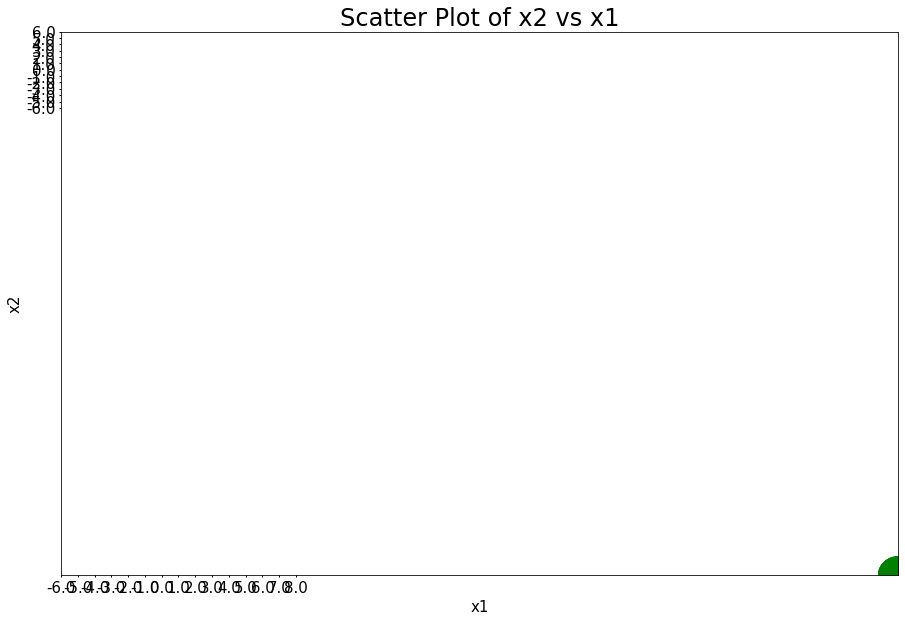

In [73]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

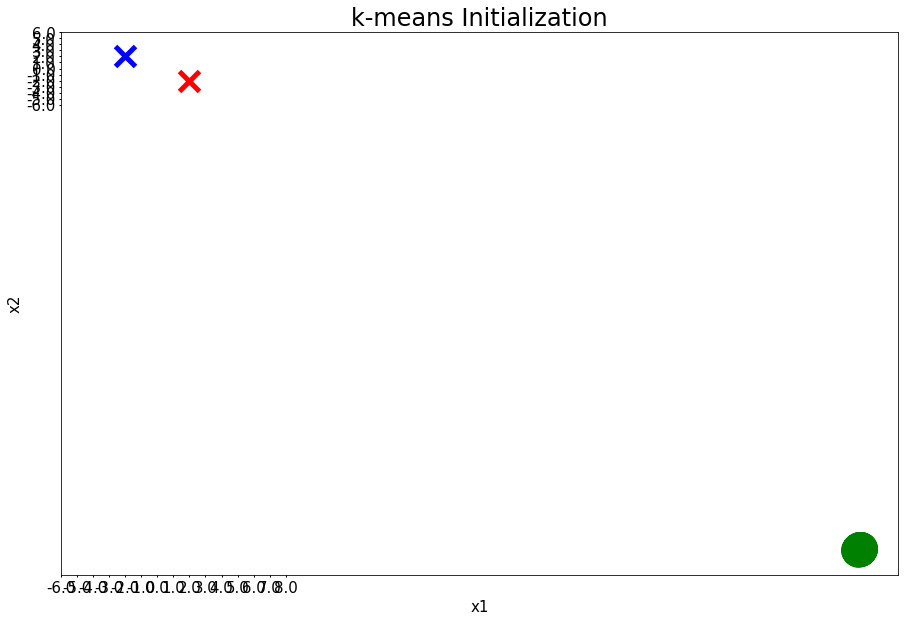

In [74]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster 


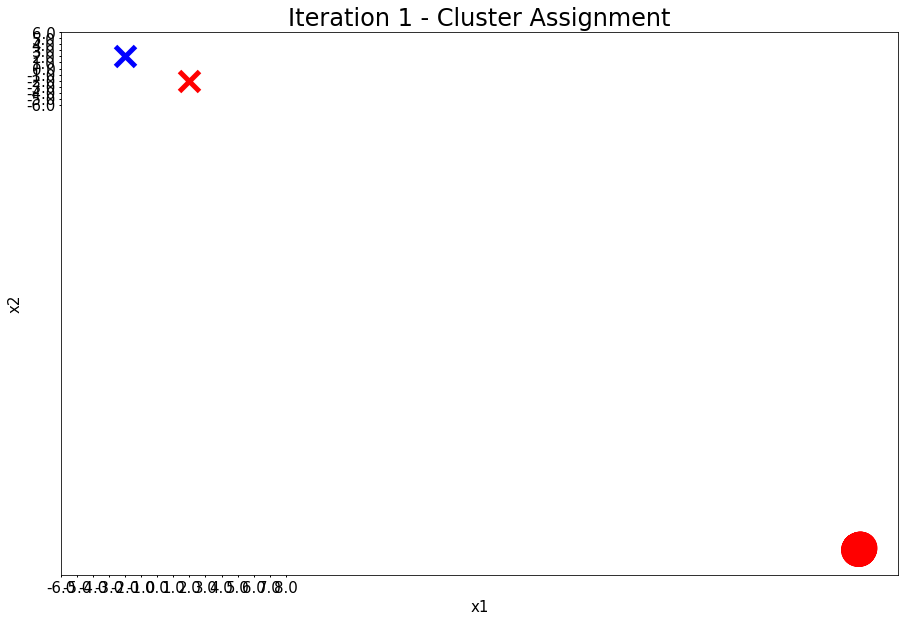

Iteration 1 - Press Enter to update the centers 


C:\Users\Zhan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Zhan\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


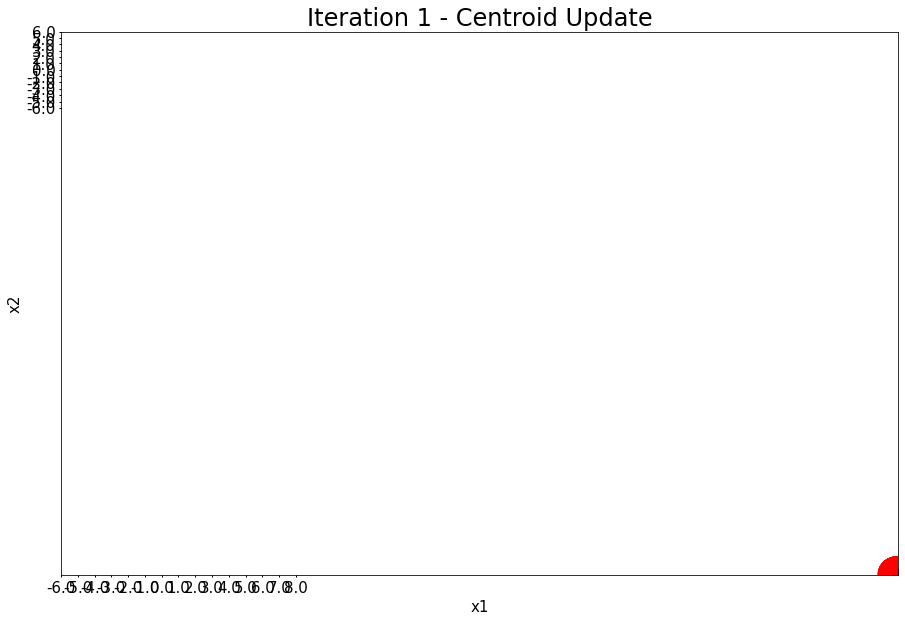

Iteration 2 - Press Enter to update the members of each cluster 


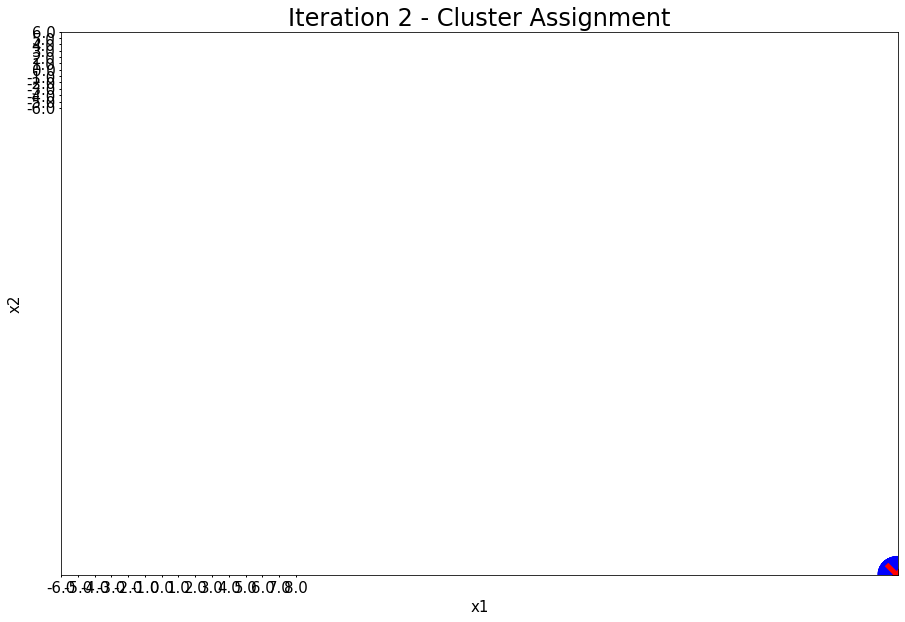

Iteration 2 - Press Enter to update the centers 


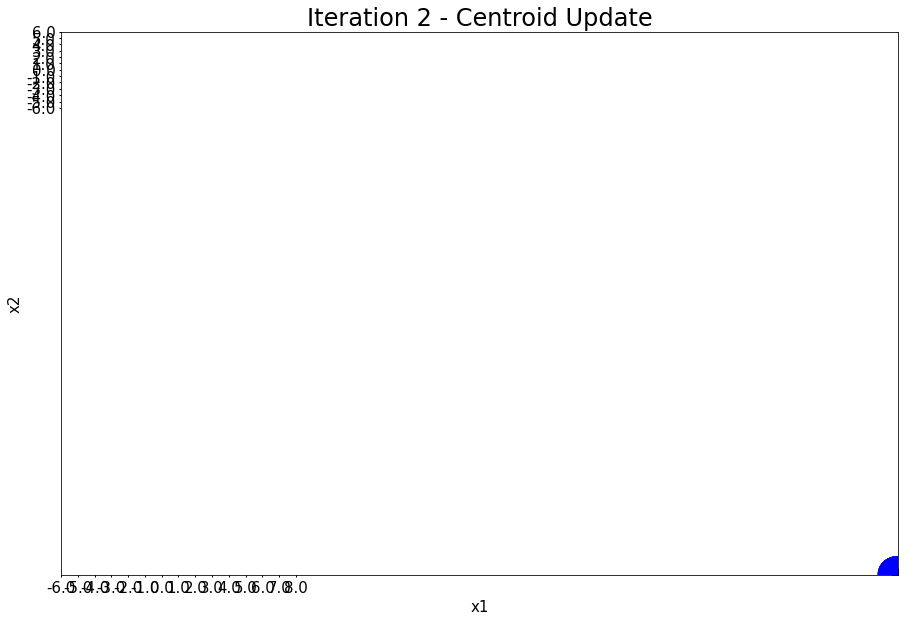

Iteration 3 - Press Enter to update the members of each cluster 


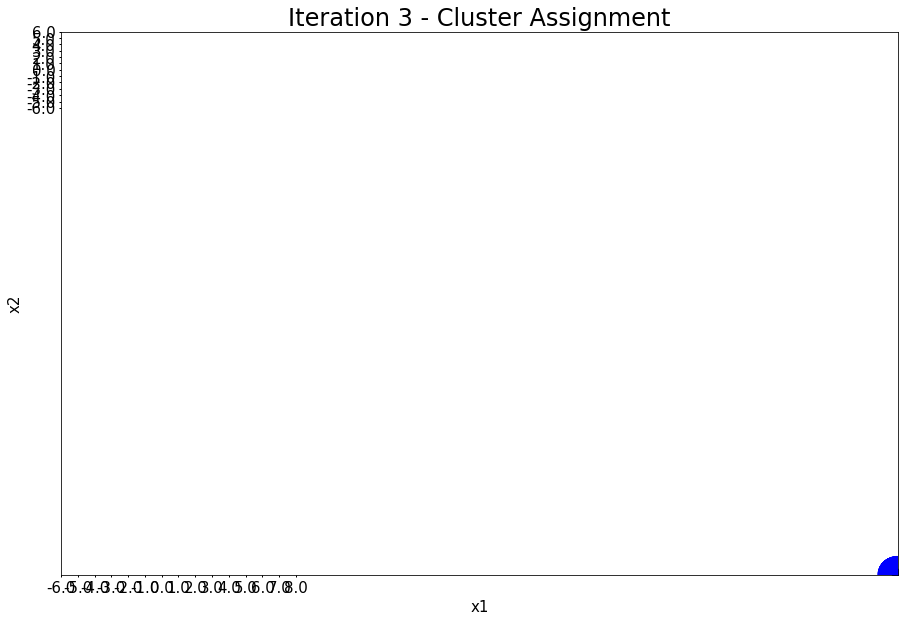

Iteration 3 - Press Enter to update the centers 


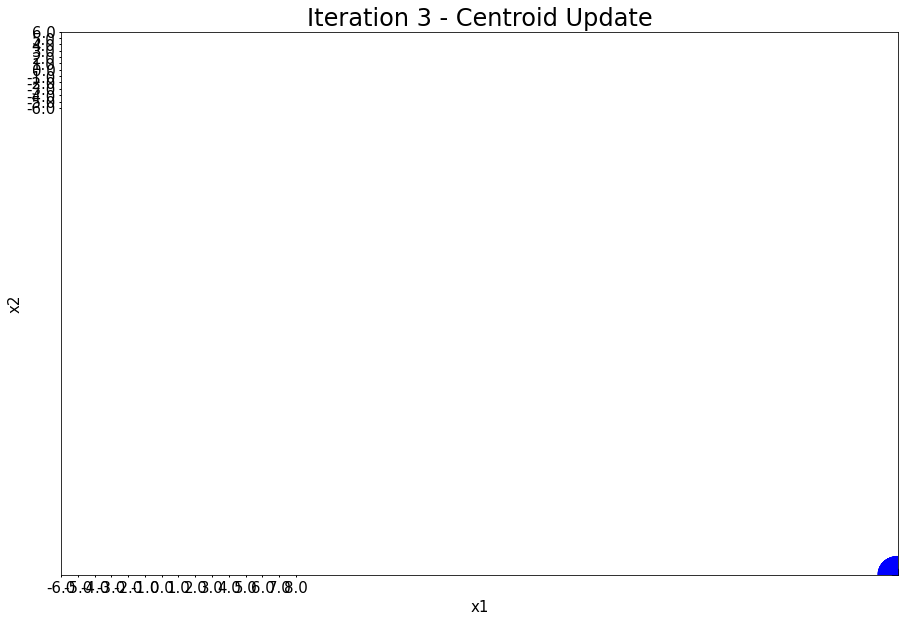

Iteration 4 - Press Enter to update the members of each cluster 


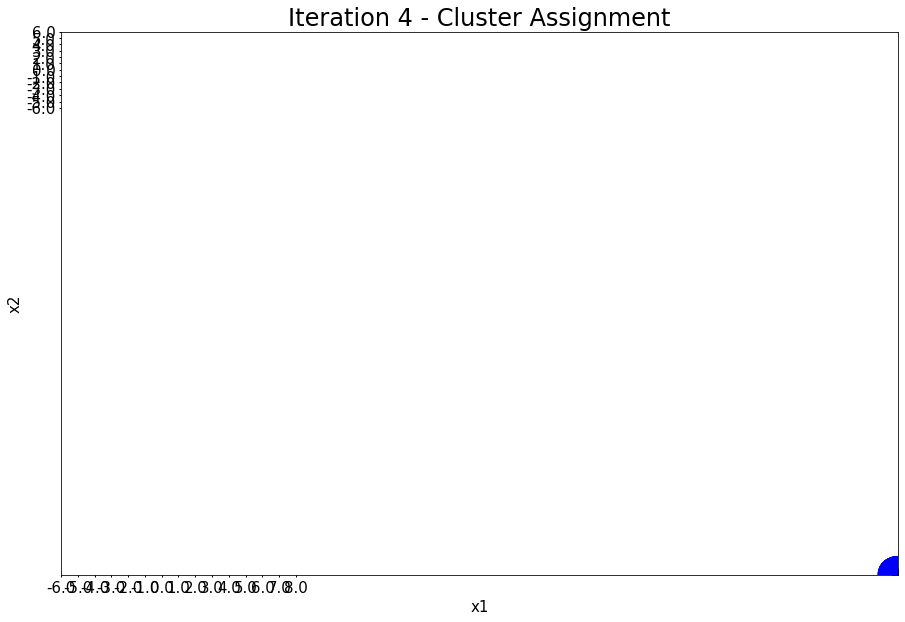

Iteration 4 - Press Enter to update the centers 


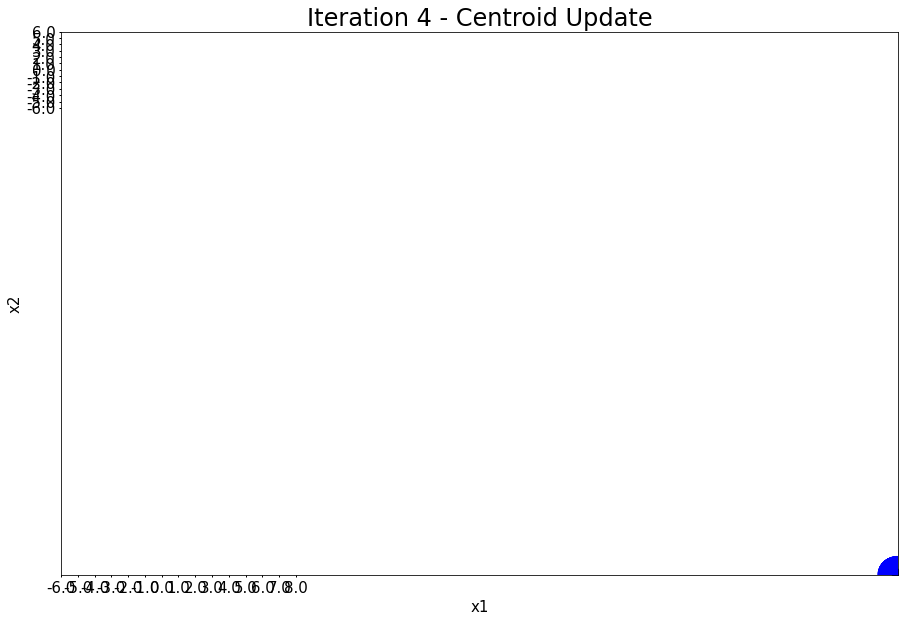

In [75]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

NameError: name 'X' is not defined

<Figure size 1080x720 with 0 Axes>